In [1]:
import bbbfs_algorithms
import networkit as nk
import numpy as np
import bbbfs_algorithms
import matplotlib.pyplot as plt

In [2]:
def powerlaw_dist(tau=2.5, x_min=1, n=1000):
    """sample from a tau exponent power law distribution
    pdf: prop to x^-(a+1), i.e. tau = a+1
    mean: ((tau-1) x_min)/(tau - 2) for tau > 2
    x_min: support is [x_min, inf]
    size: number of samples to draw
    """
    a = tau-1
    pareto = (np.random.pareto(a, size=n) + 1) * x_min
    return pareto

1000
0
1
2
3
avg_work: 34.8014
log_n(avg_work): 0.5138655717374127
10000
0
1
2
3
avg_work: 82.4226
log_n(avg_work): 0.4790115775284671
100000
0
1
2
3
avg_work: 246.368
log_n(avg_work): 0.4783168595897689
200000
0
1
2
3
avg_work: 342.2052
log_n(avg_work): 0.47807437548485193
400000
0
1
2
3
avg_work: 551.3078
log_n(avg_work): 0.48935465547341034
700000
0
1
2
3
avg_work: 615.673
log_n(avg_work): 0.4772118601208621
1000000
0
1
2
3
avg_work: 1703.1368
log_n(avg_work): 0.5385415888216221


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'float'

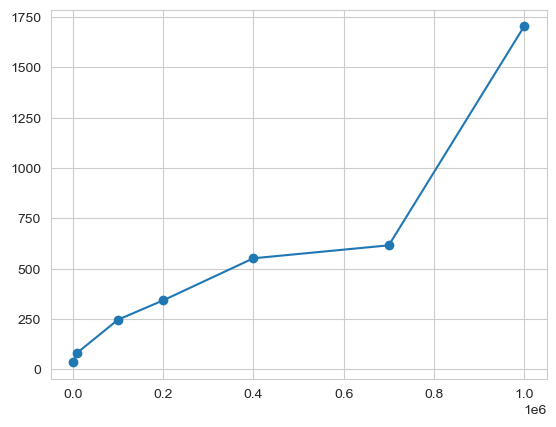

In [4]:
def do_stuff(tau, ns, num_cl_per_n=4, pairs=5000):
    ns = np.array(ns)
    avg_work_list = []
    for n in ns:
        print(n)
        for _ in range(num_cl_per_n):
            print(_)
            degree_seq = 2 * powerlaw_dist(tau=tau, x_min=1, n=n)
            gen = nk.generators.ChungLuGenerator(degree_seq)
            g = gen.generate()

            us = np.random.choice(n, size=pairs)
            vs = np.random.choice(n, size=pairs)
            avg_works = []

            for i, u in enumerate(us):
                v = vs[i]
                
                bbfs = bbbfs_algorithms.BiBFS(g, u, v)
                dist = bbfs.run()
                avg_works.append(len(bbfs.sBFS.seen) + len(bbfs.tBFS.seen))

        avg_work = np.mean(avg_works)


        print(f'avg_work: {avg_work}')
        print(f'log_n(avg_work): {np.emath.logn(n, avg_work)}')
        avg_work_list.append(avg_work)


    plt.plot(ns, avg_work_list, label='avg work', marker='o')
    plt.plot(ns, 8*ns**((tau-2)/(tau-1)), label='n^((tau-2)/(tau-1))')
    plt.plot(ns, ns**(1/2), label='n^(1/2)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

# do_stuff(2.3, list(map(int, [1000, 10000, 100000, 200000, 400000, 700000, 1e6, 3e6, 5e6, 1e7])))
# do_stuff(2.3, [1000])

do_stuff(2.3, list(map(int, [1000, 10000, 100000, 200000, 400000, 700000, 1e6])))